In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("creditcard.csv")

Total null values in the dataframe:  0


<ipython-input-4-1524522146>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel", width=0.4)
<ipython-input-4-1524522146>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud'])


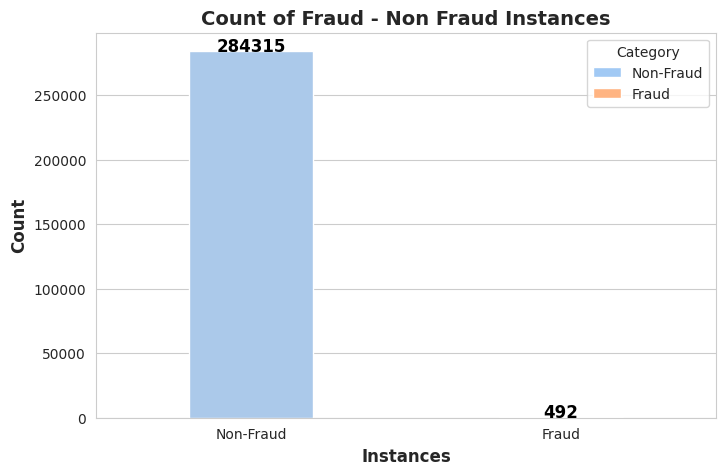

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Total null values in the dataframe: ", df.isnull().sum().sum())

value_counts = df['Class'].value_counts()


sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel", width=0.4)

plt.xlabel('Instances', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Non-Fraud', 'Fraud'])
plt.title('Count of Fraud - Non Fraud Instances', fontsize=14, fontweight='bold')

for i, v in enumerate(value_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=12, fontweight='bold', color='black')

legend_labels = ['Non-Fraud', 'Fraud']
colors = sns.color_palette("pastel")[:len(legend_labels)]
legend_patches = [plt.Rectangle((0,0),1,1, fc=color) for color in colors]
plt.legend(legend_patches, legend_labels, title="Category", loc="upper right")

plt.show()


<ipython-input-19-1220889098>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel", width=0.5)
<ipython-input-19-1220889098>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=12)


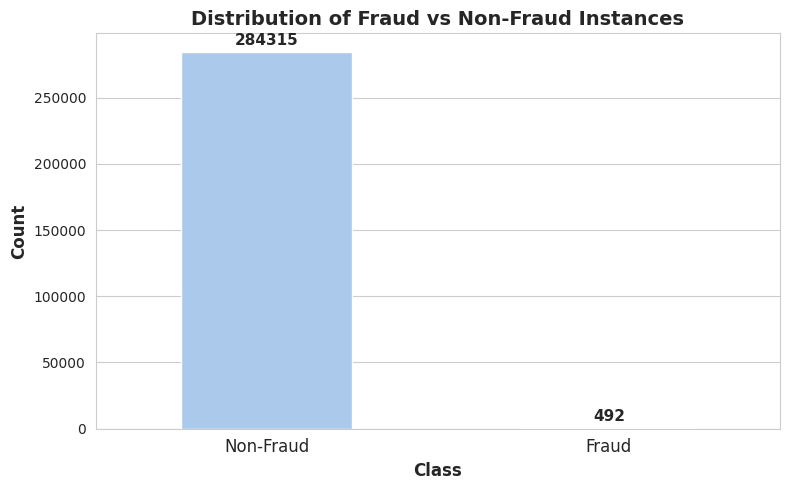

In [ ]:
value_counts = df['Class'].value_counts().sort_index()


sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="pastel", width=0.5)

ax.set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=12)
plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Fraud vs Non-Fraud Instances', fontsize=14, fontweight='bold')


for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', fontsize=11, fontweight='bold')


plt.tight_layout()
plt.show()

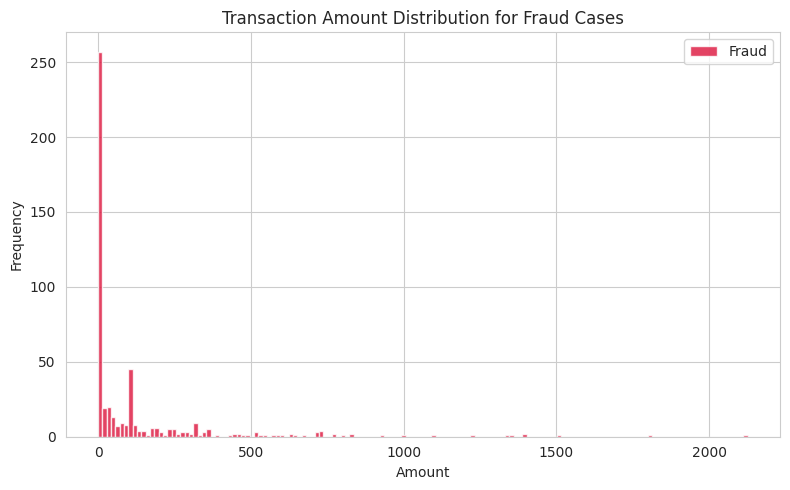

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))


df.Amount[df['Class'] == 1].hist(bins=150, color='crimson', alpha=0.8, label='Fraud')

plt.title('Transaction Amount Distribution for Fraud Cases')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


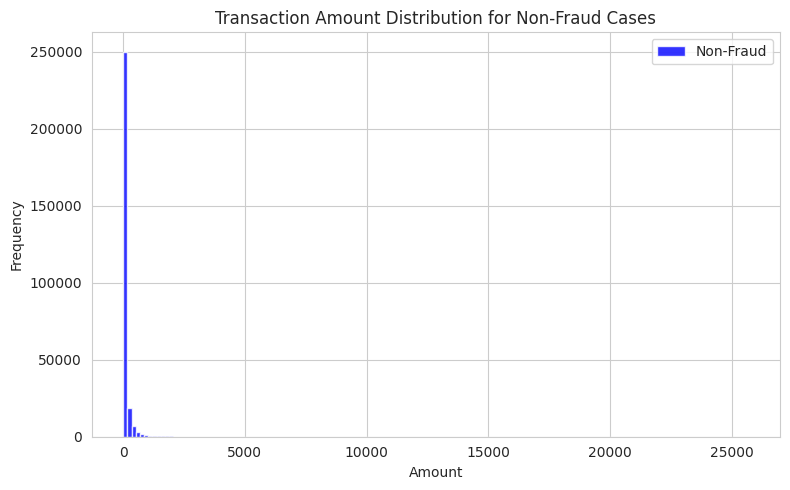

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.Amount[df['Class'] == 0].hist(bins=150, color='blue', alpha=0.8, label='Non-Fraud')

plt.title('Transaction Amount Distribution for Non-Fraud Cases')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


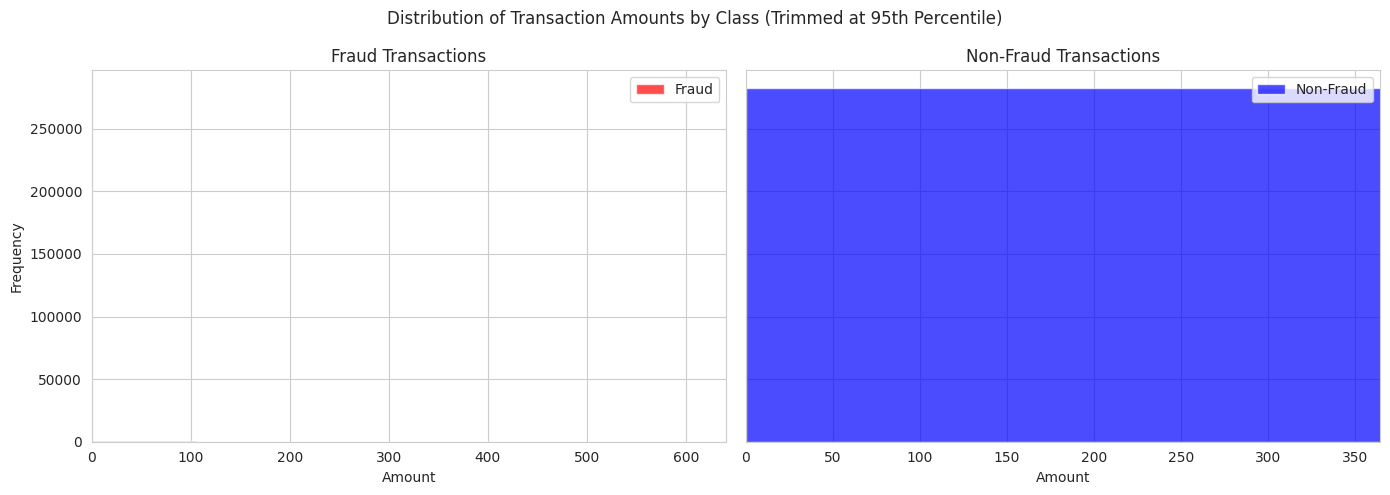

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fraud_amounts = df.Amount[df['Class'] == 1]
nonfraud_amounts = df.Amount[df['Class'] == 0]

fraud_min, fraud_max = np.percentile(fraud_amounts, [0, 95])
nonfraud_min, nonfraud_max = np.percentile(nonfraud_amounts, [0, 95])

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)


axs[0].hist(fraud_amounts, bins=20, color='red', alpha=0.7)
axs[0].set_xlim(fraud_min, fraud_max)
axs[0].set_title('Fraud Transactions')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Frequency')
axs[0].legend(['Fraud'])

axs[1].hist(nonfraud_amounts, bins=20, color='blue', alpha=0.7)
axs[1].set_xlim(nonfraud_min, nonfraud_max)
axs[1].set_title('Non-Fraud Transactions')
axs[1].set_xlabel('Amount')
axs[1].legend(['Non-Fraud'])

plt.suptitle('Distribution of Transaction Amounts by Class (Trimmed at 95th Percentile)')
plt.tight_layout()
plt.show()


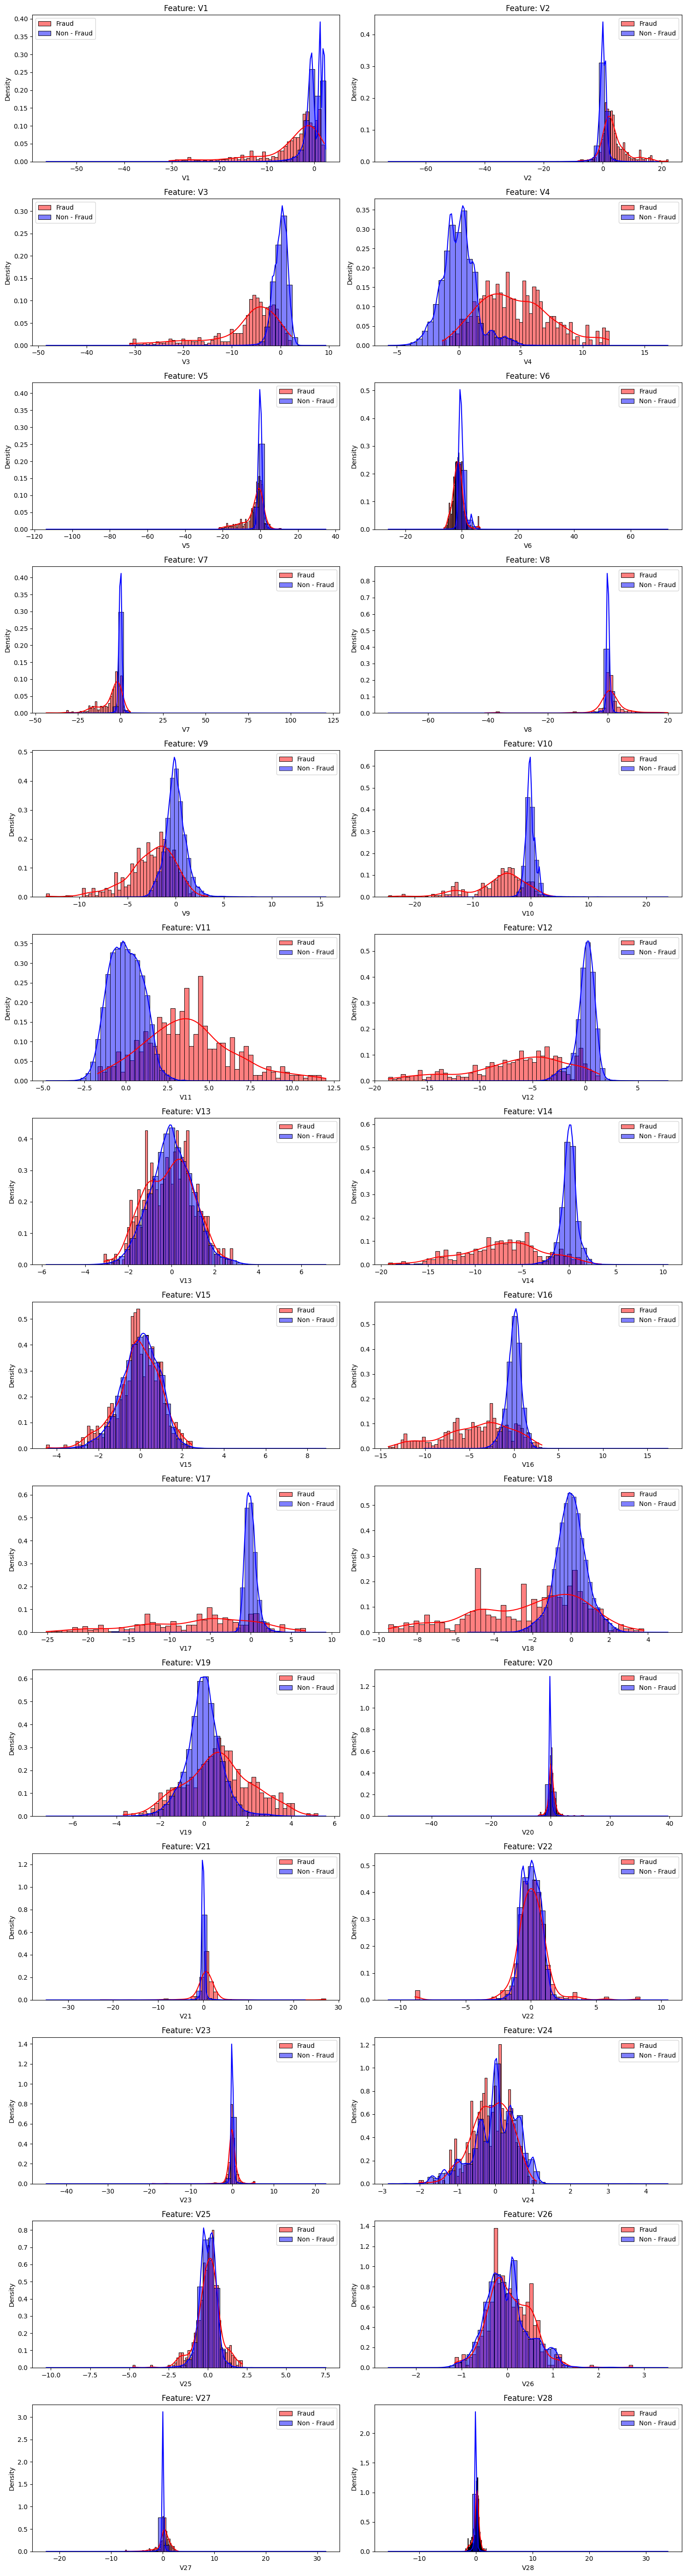

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

v_columns = [f'V{i}' for i in range(1, 29)]
v_features = df[v_columns]

n_rows = 14

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 4))


axes = axes.flatten()

for i, cn in enumerate(v_columns):
    ax = axes[i]
    sns.histplot(df[cn][df.Class == 1], bins=50, color='red', label='Fraud', kde=True, stat='density', ax=ax)
    sns.histplot(df[cn][df.Class == 0], bins=50, color='blue', label='Non - Fraud', kde=True, stat='density', ax=ax)

    ax.set_title(f'Feature: {cn}')
    ax.legend()


plt.tight_layout()
plt.show()


<Axes: >

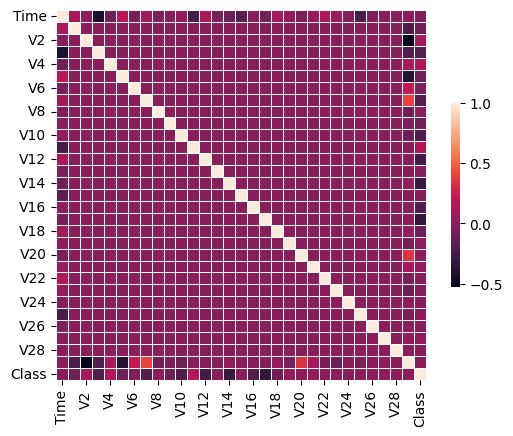

In [ ]:
corr = df.corr()

sns.heatmap(corr,square=True, linewidths=.5, cbar_kws={"shrink": .5})

V14: KS Statistic = 0.8428
V10: KS Statistic = 0.8043
V12: KS Statistic = 0.7839
V4: KS Statistic = 0.7664
V11: KS Statistic = 0.7561
V17: KS Statistic = 0.7452
V3: KS Statistic = 0.7037
V16: KS Statistic = 0.6865
V7: KS Statistic = 0.6606
V2: KS Statistic = 0.6332
V9: KS Statistic = 0.5763
V21: KS Statistic = 0.5185
V18: KS Statistic = 0.5034
V6: KS Statistic = 0.4864
V1: KS Statistic = 0.4753
V27: KS Statistic = 0.4695
V5: KS Statistic = 0.4364
V28: KS Statistic = 0.3685
V8: KS Statistic = 0.3684
V20: KS Statistic = 0.3639
V19: KS Statistic = 0.3347
V23: KS Statistic = 0.1819
V24: KS Statistic = 0.1292
V13: KS Statistic = 0.1031
V26: KS Statistic = 0.0908
V25: KS Statistic = 0.0881
V15: KS Statistic = 0.0634
V22: KS Statistic = 0.0579


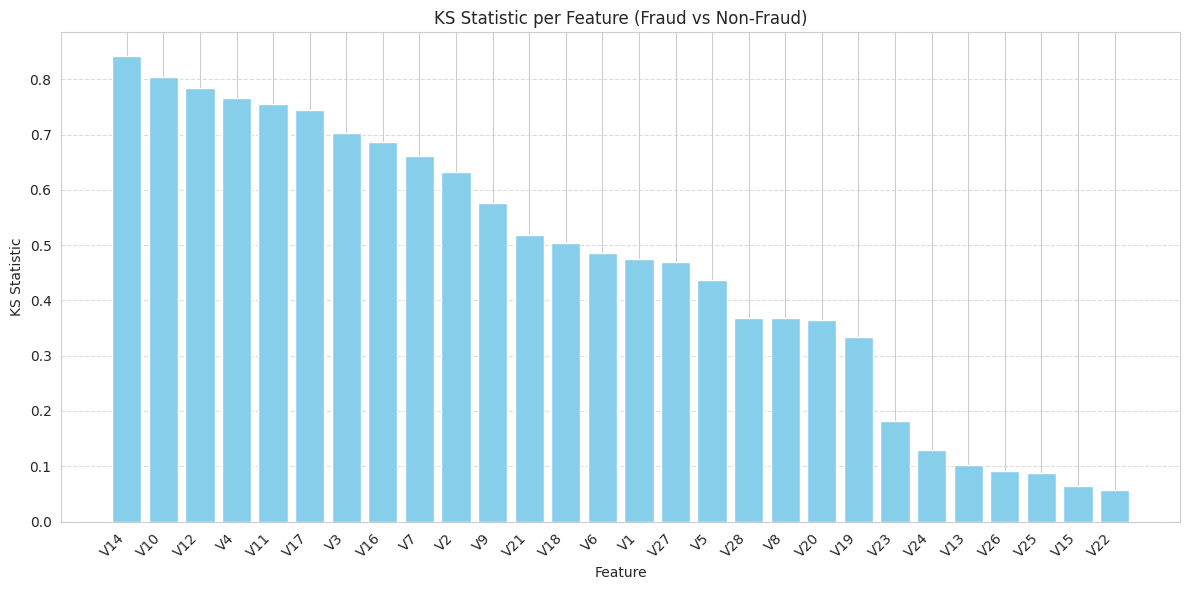

In [ ]:
from scipy.stats import ks_2samp

v_columns = [f'V{i}' for i in range(1, 29)]
ks_results = {}

for col in v_columns:
    fraud_data = df[df['Class'] == 1][col]
    nonfraud_data = df[df['Class'] == 0][col]
    ks_stat, p_value = ks_2samp(fraud_data, nonfraud_data)
    ks_results[col] = ks_stat

sorted_ks = sorted(ks_results.items(), key=lambda x: x[1], reverse=True)

for feature, ks_stat in sorted_ks:
    print(f"{feature}: KS Statistic = {ks_stat:.4f}")

features = [item[0] for item in sorted_ks]
ks_stats = [item[1] for item in sorted_ks]

plt.figure(figsize=(12, 6))
plt.bar(features, ks_stats, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('KS Statistic per Feature (Fraud vs Non-Fraud)')
plt.xlabel('Feature')
plt.ylabel('KS Statistic')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


V15: JS Divergence = 0.1326
V22: JS Divergence = 0.1419
V13: JS Divergence = 0.1578
V26: JS Divergence = 0.1755
V25: JS Divergence = 0.1780
V24: JS Divergence = 0.2365
V23: JS Divergence = 0.2570
V20: JS Divergence = 0.3371
V19: JS Divergence = 0.3403
V8: JS Divergence = 0.3842
V5: JS Divergence = 0.4079
V1: JS Divergence = 0.4213
V28: JS Divergence = 0.4309
V6: JS Divergence = 0.4321
V21: JS Divergence = 0.4326
V18: JS Divergence = 0.4651
V27: JS Divergence = 0.4740
V9: JS Divergence = 0.4929
V2: JS Divergence = 0.5243
V7: JS Divergence = 0.5348
V3: JS Divergence = 0.5816
V16: JS Divergence = 0.5894
V4: JS Divergence = 0.6078
V11: JS Divergence = 0.6181
V12: JS Divergence = 0.6464
V10: JS Divergence = 0.6494
V17: JS Divergence = 0.6577
V14: JS Divergence = 0.6923


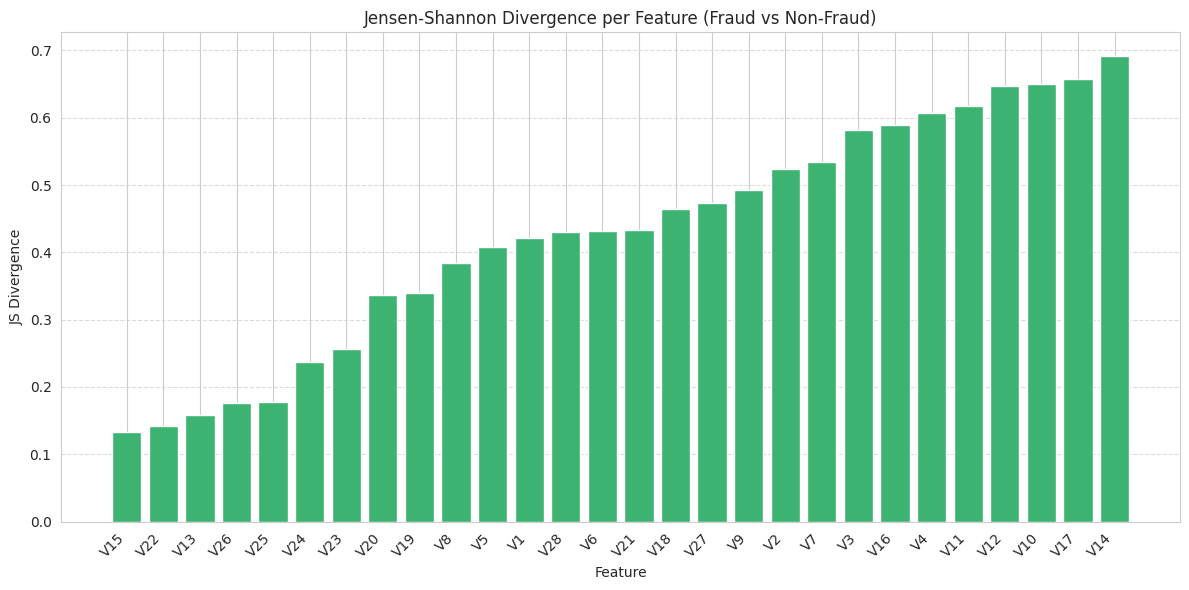

In [ ]:
from scipy.spatial.distance import jensenshannon
import numpy as np

def js_divergence(fraud_data, nonfraud_data, bins=50):
    fraud_hist, bin_edges = np.histogram(fraud_data, bins=bins, density=True)
    nonfraud_hist, _ = np.histogram(nonfraud_data, bins=bin_edges, density=True)
    fraud_hist += 1e-12
    nonfraud_hist += 1e-12

    fraud_hist /= fraud_hist.sum()
    nonfraud_hist /= nonfraud_hist.sum()

    return jensenshannon(fraud_hist, nonfraud_hist)

v_columns = [f'V{i}' for i in range(1, 29)]
js_results = {}

for col in v_columns:
    fraud = df[df['Class'] == 1][col]
    nonfraud = df[df['Class'] == 0][col]
    js = js_divergence(fraud, nonfraud)
    js_results[col] = js

sorted_js = sorted(js_results.items(), key=lambda x: x[1])

for feature, js in sorted_js:
    print(f"{feature}: JS Divergence = {js:.4f}")

features = [item[0] for item in sorted_js]
js_values = [item[1] for item in sorted_js]

plt.figure(figsize=(12, 6))
plt.bar(features, js_values, color='mediumseagreen')
plt.xticks(rotation=45, ha='right')
plt.title('Jensen-Shannon Divergence per Feature (Fraud vs Non-Fraud)')
plt.xlabel('Feature')
plt.ylabel('JS Divergence')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


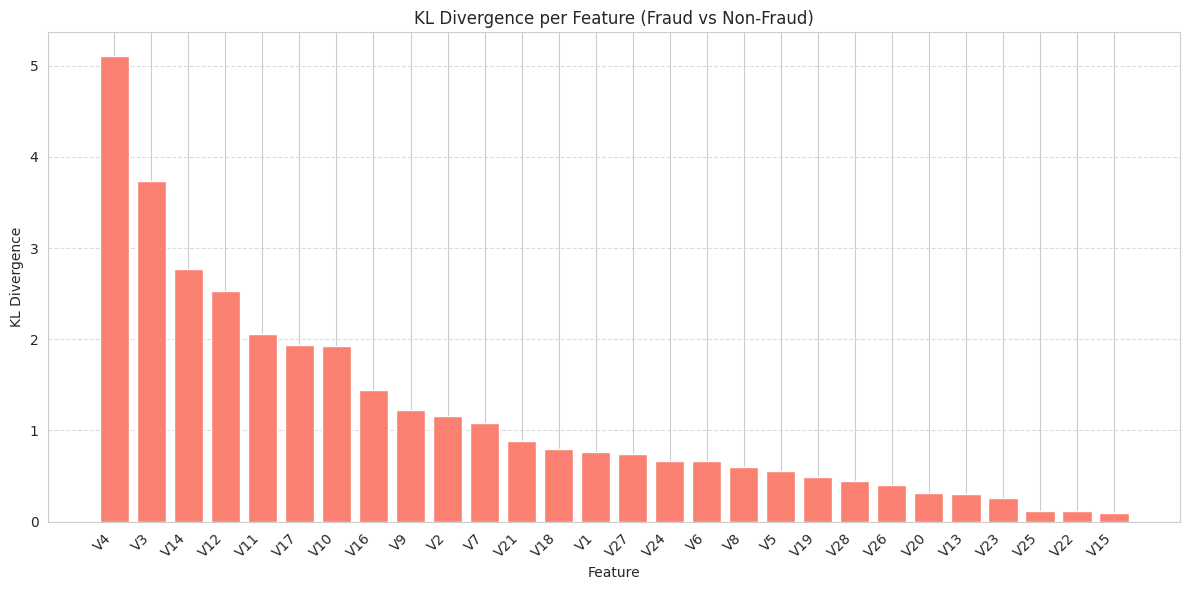

In [ ]:
import numpy as np
from scipy.stats import entropy

kl_results = {}

for col in v_columns:
    fraud_data = df[df['Class'] == 1][col]
    nonfraud_data = df[df['Class'] == 0][col]

    bins = np.histogram_bin_edges(np.concatenate((fraud_data, nonfraud_data)), bins=100)
    fraud_hist, _ = np.histogram(fraud_data, bins=bins, density=True)
    nonfraud_hist, _ = np.histogram(nonfraud_data, bins=bins, density=True)

    fraud_hist += 1e-10
    nonfraud_hist += 1e-10

    kl_div = entropy(nonfraud_hist, fraud_hist)
    kl_results[col] = kl_div

sorted_kl = sorted(kl_results.items(), key=lambda x: x[1], reverse=True)
features = [item[0] for item in sorted_kl]
kl_values = [item[1] for item in sorted_kl]

plt.figure(figsize=(12, 6))
plt.bar(features, kl_values, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('KL Divergence per Feature (Fraud vs Non-Fraud)')
plt.xlabel('Feature')
plt.ylabel('KL Divergence')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df = df.drop(['V22','V15','V25','V26','V13','V24','V23'],axis=1)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.108821,0.104533,10.00,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time','Amount'],axis=1)

In [ ]:
y = df['Class']
df = df.drop(['Class'],axis=1)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V16,V17,V18,V19,V20,V21,V27,V28,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,4.626942,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.449624,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.108821,0.104533,-0.313249


Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2849/2849 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9986 - loss: 0.0204 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 2/6
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 3/6
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0025
Epoch 4/6
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 5/6
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0023
Epoch 6/6
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9996 - val_loss: 0.0022
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0036
Accuracy: 0.9994
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


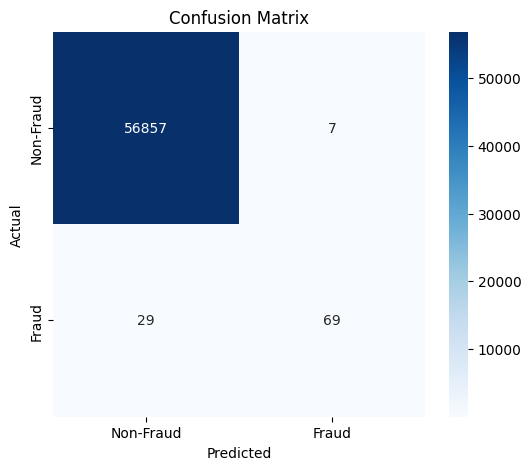

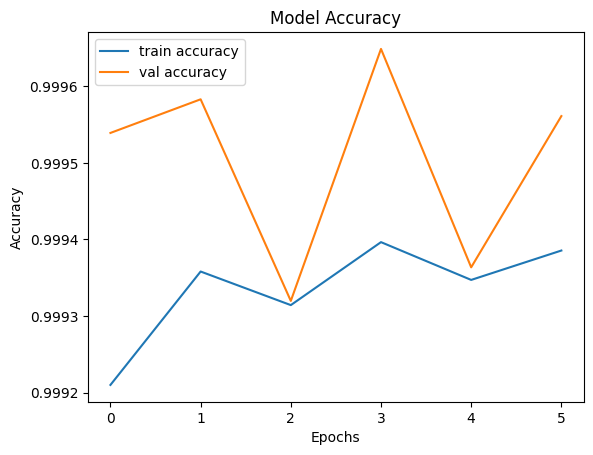

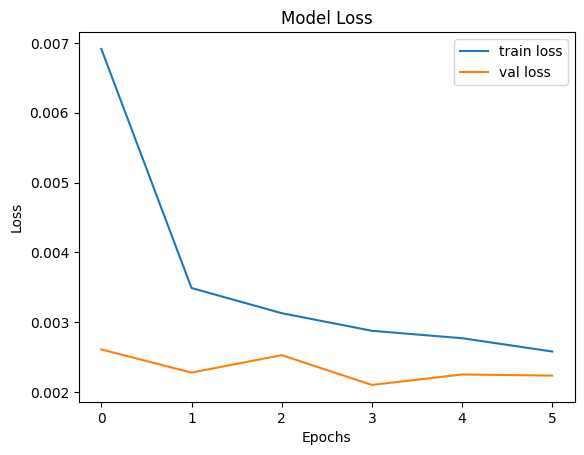

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.70      0.79        98

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


print(classification_report(y_test, y_pred))


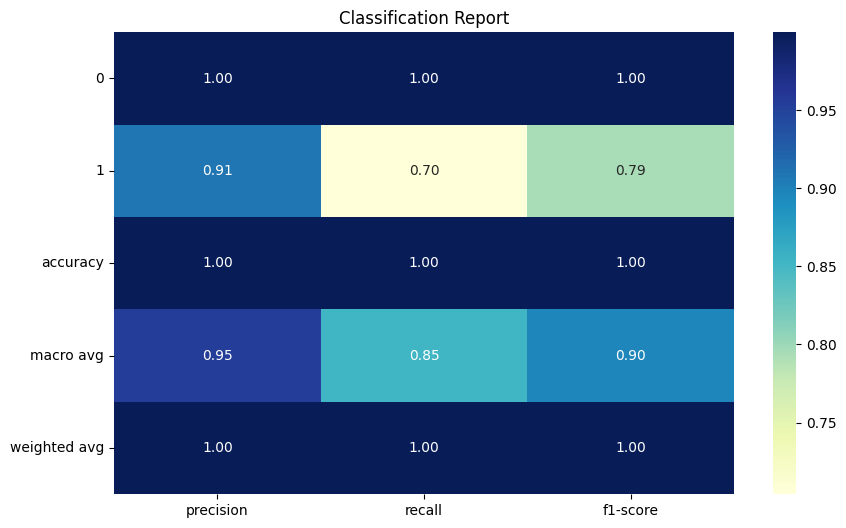

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


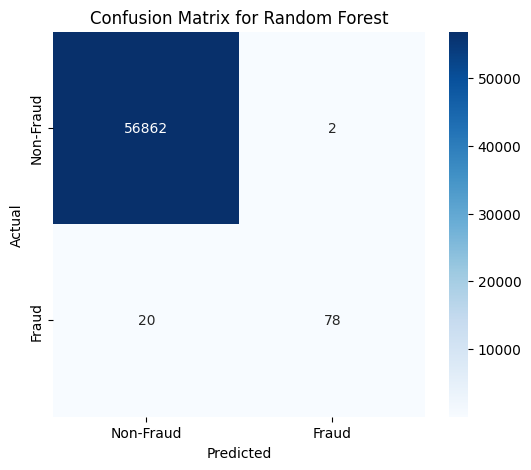

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


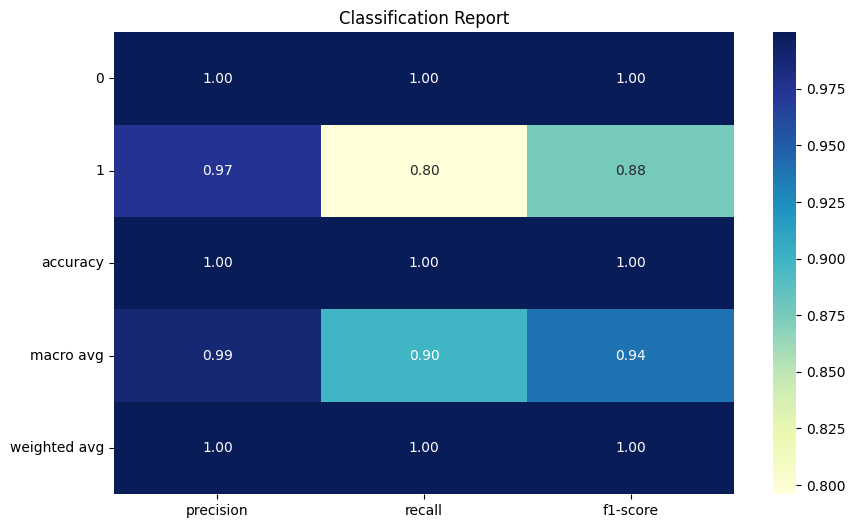

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


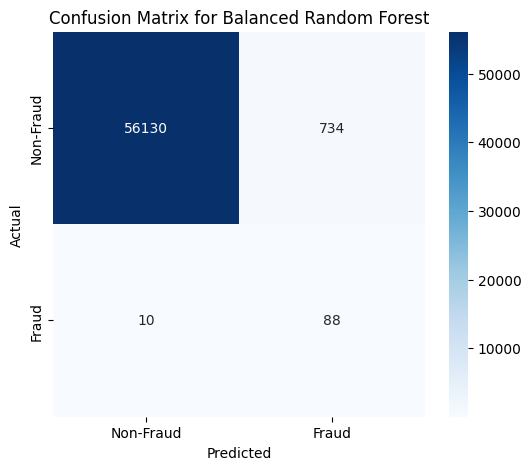

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100)

brf.fit(X_train, y_train)


y_pred = brf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Balanced Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




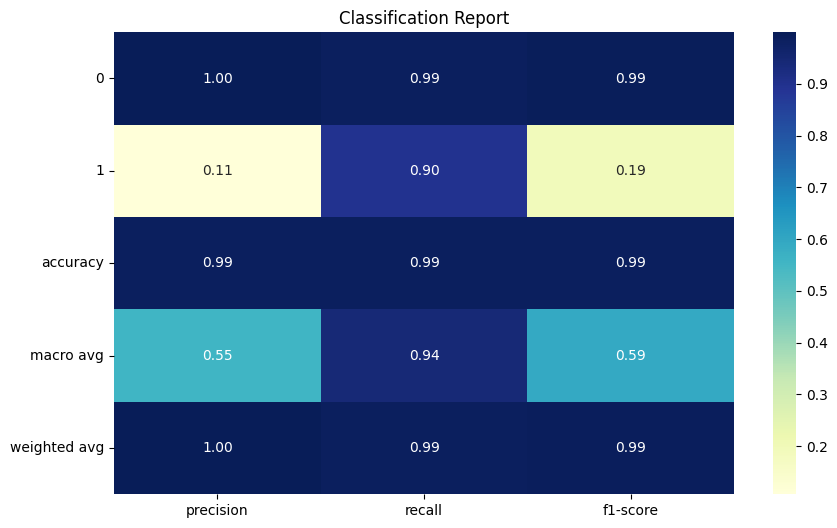

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")


plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


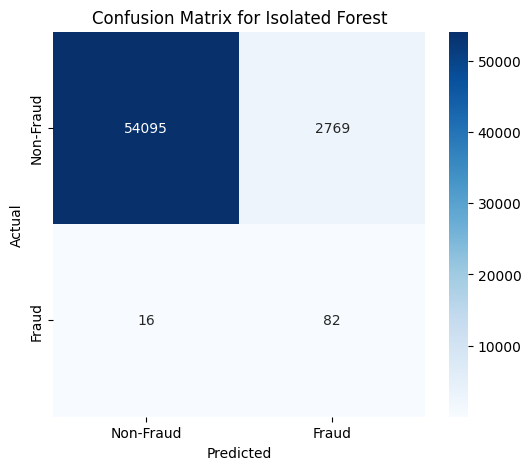

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_train)


y_pred = iso_forest.predict(X_test)
y_pred_corrected = np.where(y_pred == -1, 1, 0)

cm = confusion_matrix(y_test, y_pred_corrected)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Isolated Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

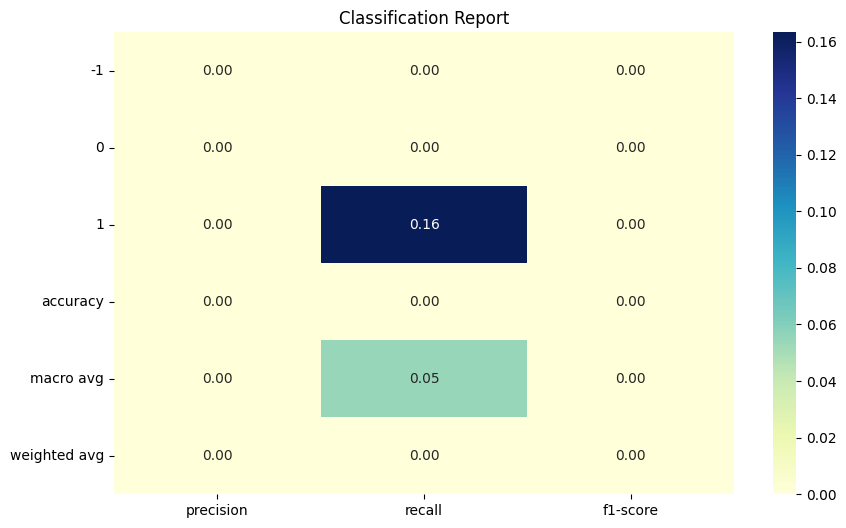

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


# Undersample

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1/10 ratio
rus = RandomUnderSampler(sampling_strategy=1/10, random_state=42)

X_resampled, y_resampled = rus.fit_resample(df, y)
print("After undersampling:", Counter(y_resampled))


After undersampling: Counter({0: 4920, 1: 492})


Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8212 - loss: 0.4485 - val_accuracy: 0.9861 - val_loss: 0.0773
Epoch 2/6
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9873 - loss: 0.0658 - val_accuracy: 0.9861 - val_loss: 0.0657
Epoch 3/6
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0602 - val_accuracy: 0.9861 - val_loss: 0.0649
Epoch 4/6
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9861 - val_loss: 0.0636
Epoch 5/6
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0515 - val_accuracy: 0.9861 - val_loss: 0.0639
Epoch 6/6
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0512 - val_accuracy: 0.9861 - val_loss: 0.0635
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0761
Accuracy: 0.9775
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


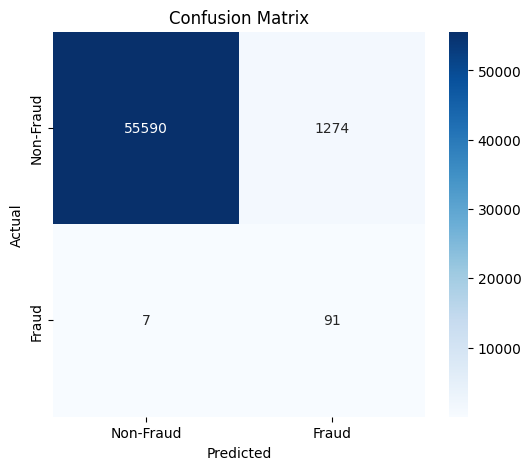

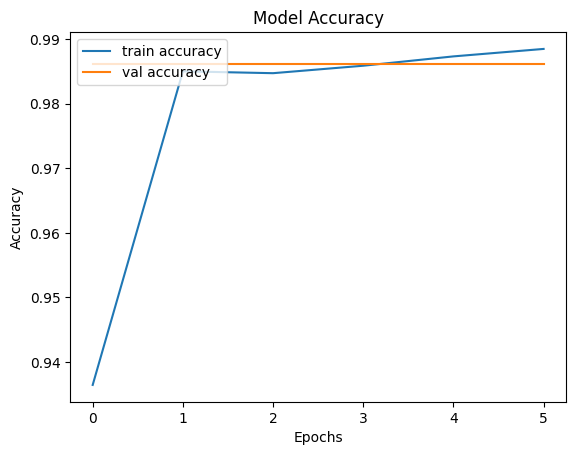

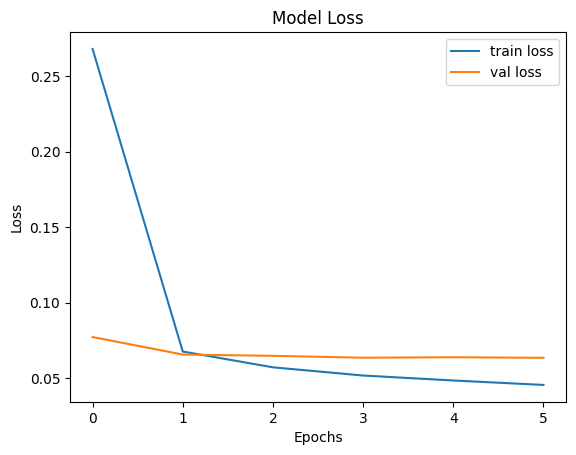

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report



X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


print(classification_report(y_test, y_pred))


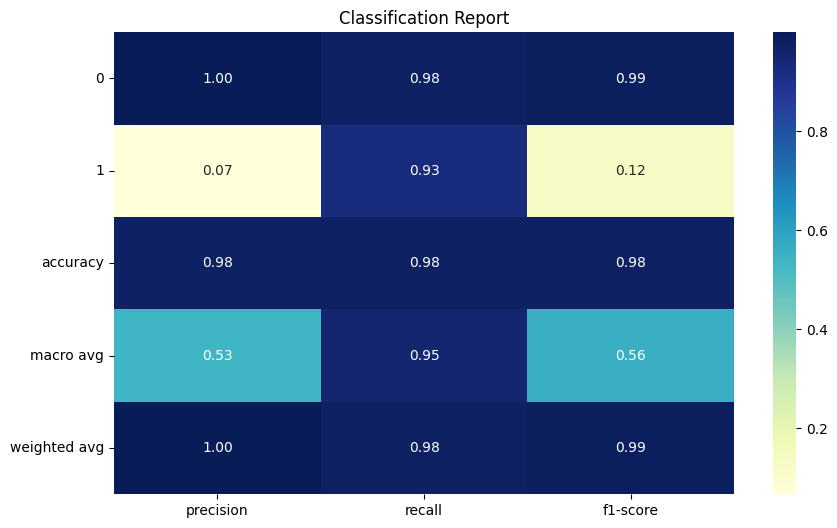

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


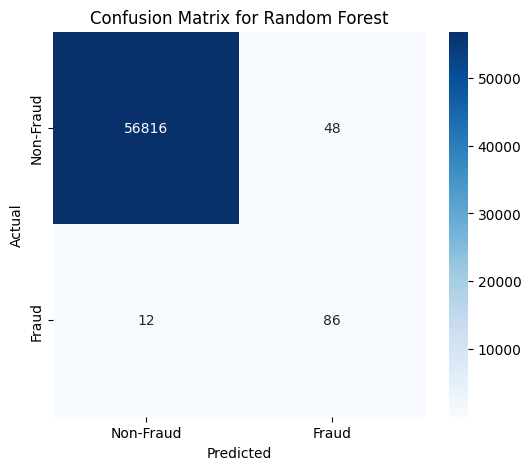

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


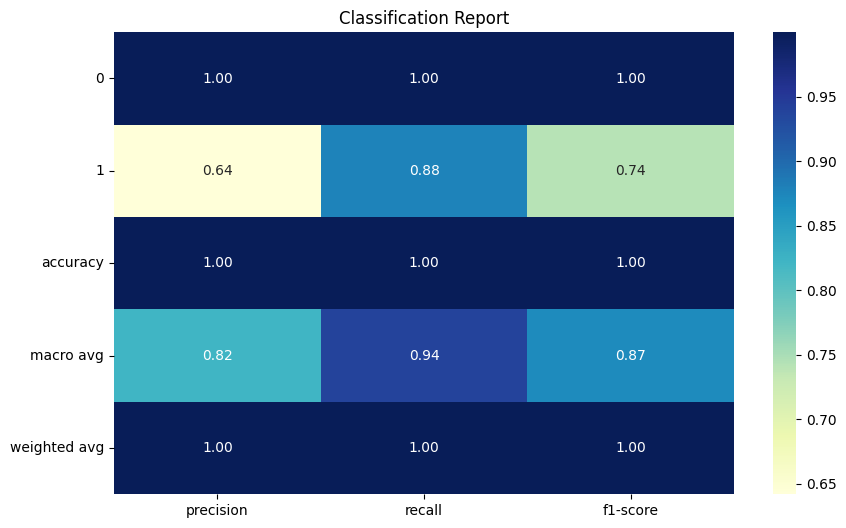

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(


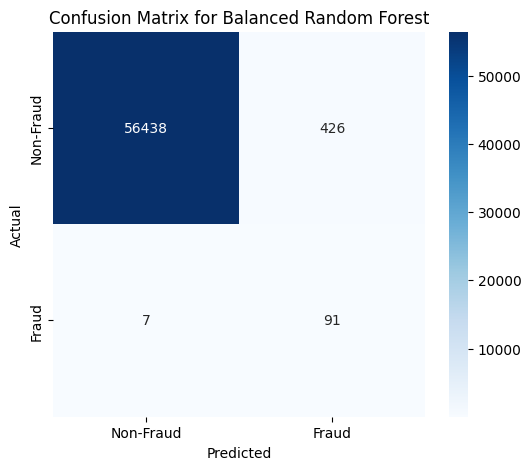

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf = BalancedRandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Balanced Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


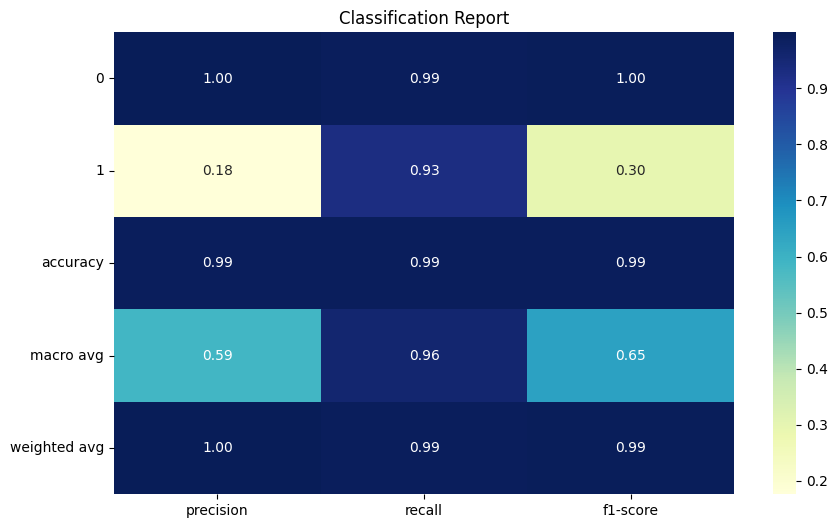

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1/20 ratio
rus = RandomUnderSampler(sampling_strategy=1/20, random_state=42)

X_resampled, y_resampled = rus.fit_resample(df, y)
print("After undersampling:", Counter(y_resampled))


After undersampling: Counter({0: 9840, 1: 492})


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8580 - loss: 0.3691 - val_accuracy: 0.9940 - val_loss: 0.0361
Epoch 2/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9903 - loss: 0.0463 - val_accuracy: 0.9933 - val_loss: 0.0331
Epoch 3/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9921 - loss: 0.0368 - val_accuracy: 0.9946 - val_loss: 0.0289
Epoch 4/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0302 - val_accuracy: 0.9940 - val_loss: 0.0325
Epoch 5/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0287 - val_accuracy: 0.9940 - val_loss: 0.0297
Epoch 6/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0271 - val_accuracy: 0.9946 - val_loss: 0.0317
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0409
Accuracy: 0.9880
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


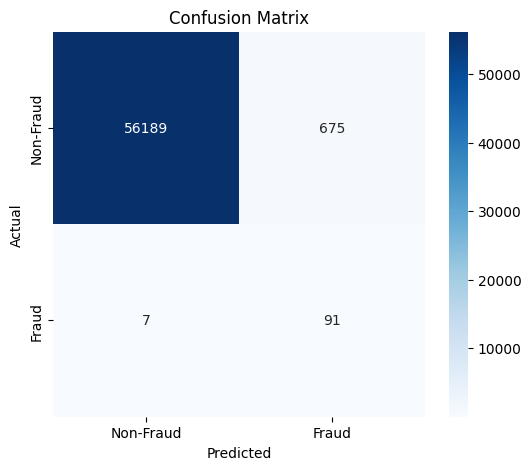

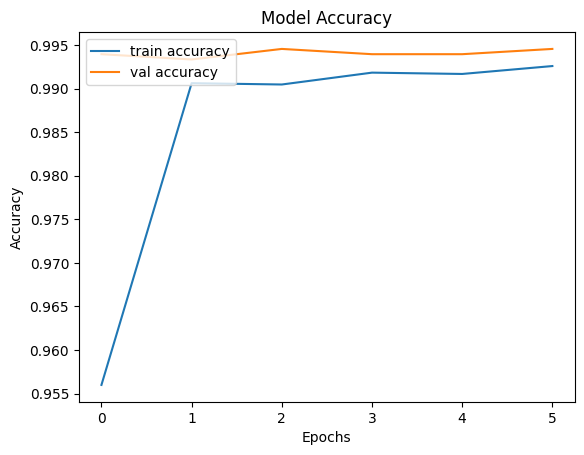

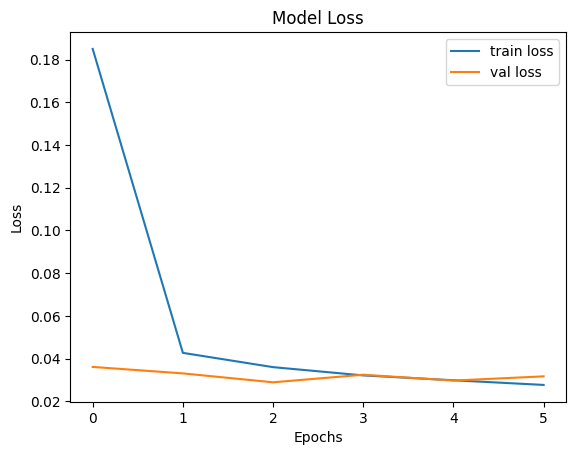

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.93      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.96      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report




X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


print(classification_report(y_test, y_pred))


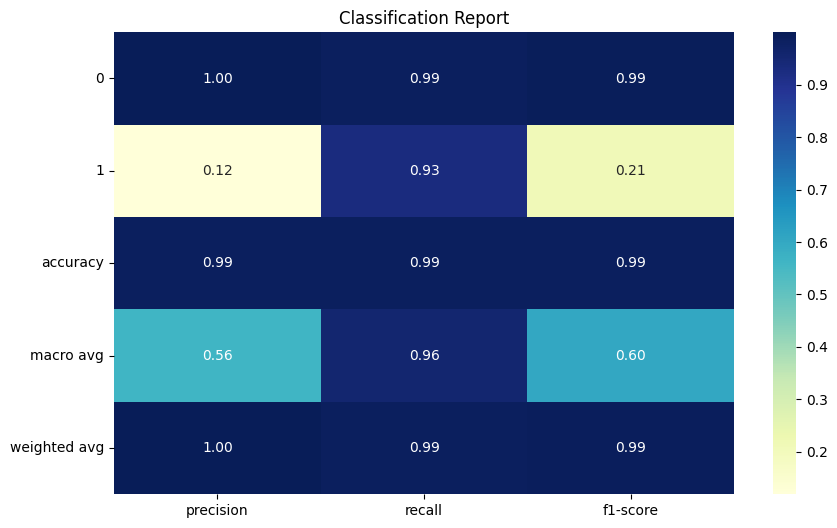

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")


plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


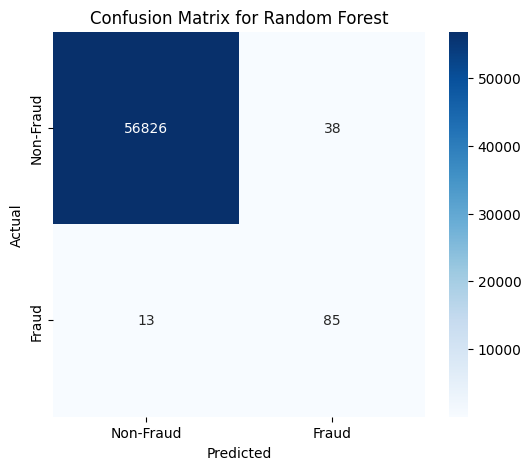

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


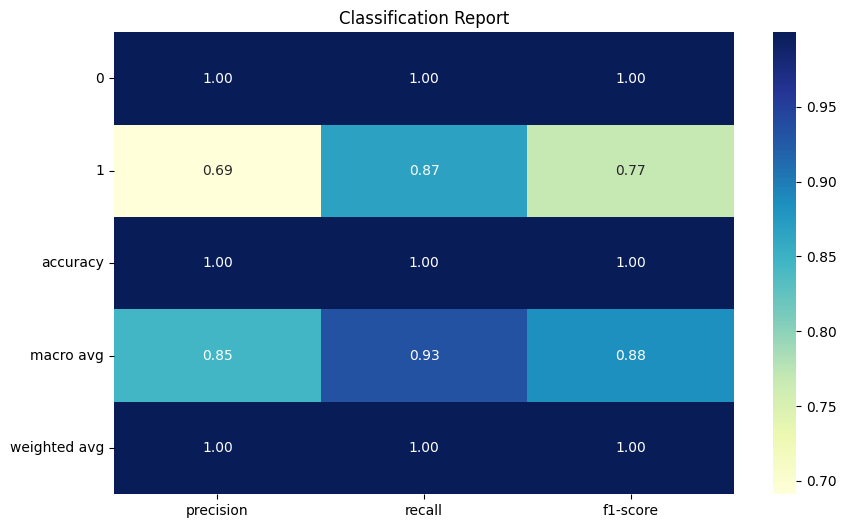

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(


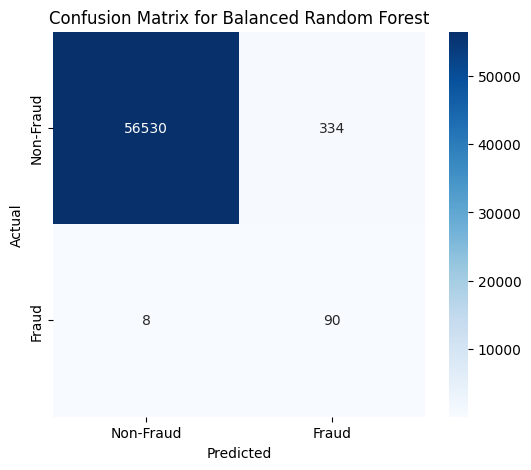

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf = BalancedRandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Balanced Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


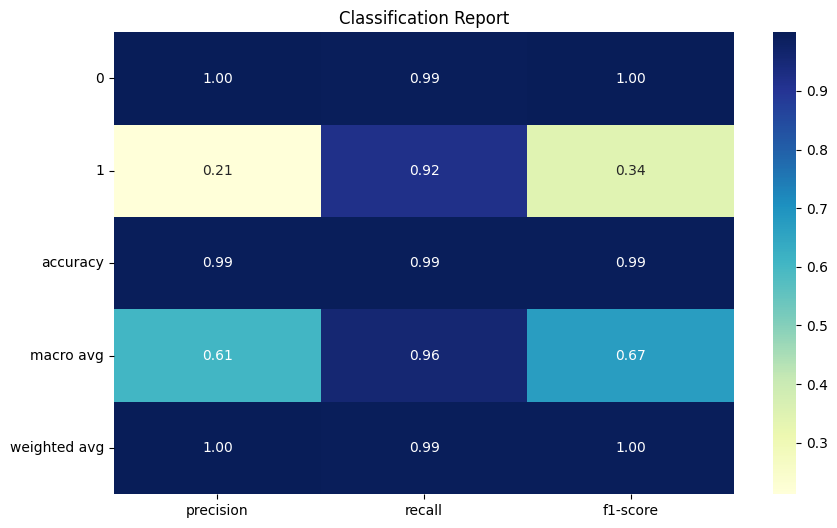

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")


plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


# Oversampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1/10 ratio
ros = RandomOverSampler(sampling_strategy=1/10, random_state=42)

X_resampled, y_resampled = ros.fit_resample(df, y)
print("After oversampling:", Counter(y_resampled))

After oversampling: Counter({0: 284315, 1: 28431})


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
3128/3128 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9843 - loss: 0.0592 - val_accuracy: 0.9943 - val_loss: 0.0134
Epoch 2/6
3128/3128 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9956 - loss: 0.0128 - val_accuracy: 0.9983 - val_loss: 0.0087
Epoch 3/6
3128/3128 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9976 - loss: 0.0076 - val_accuracy: 0.9982 - val_loss: 0.0053
Epoch 4/6
3128/3128 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9988 - val_loss: 0.0043
Epoch 5/6
3128/3128 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 6/6
3128/3128 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9982 - val_loss: 0.0069
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9619 - loss: 0.1788
Accuracy: 0.9621
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


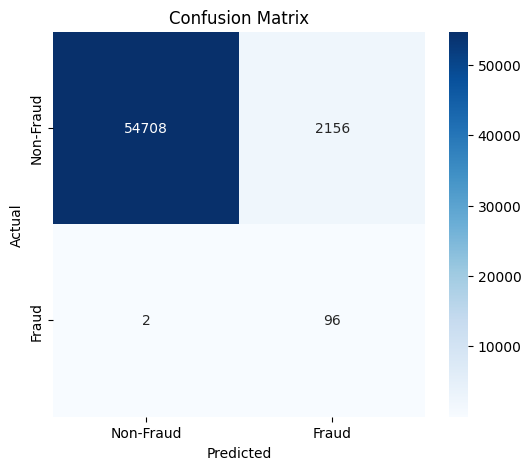

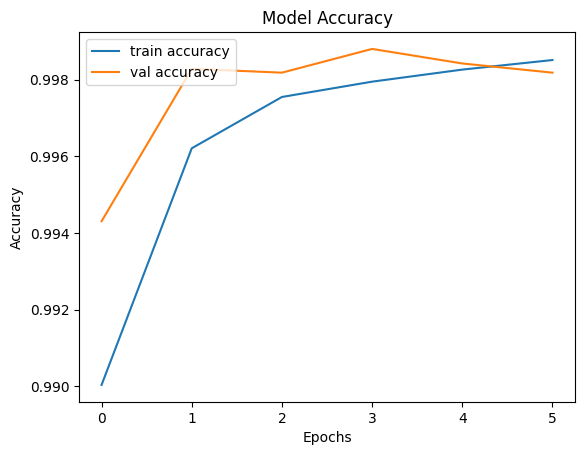

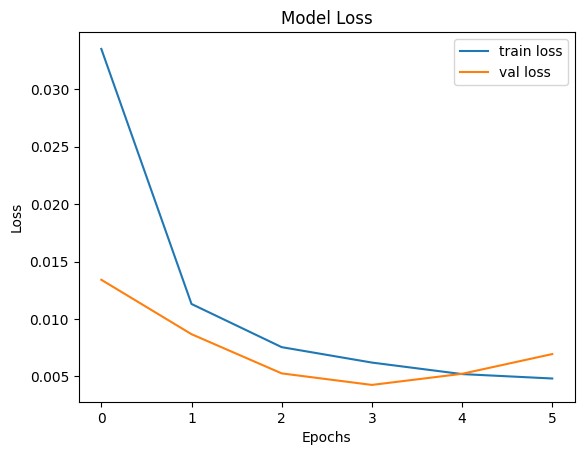

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.98      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.97      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


print(classification_report(y_test, y_pred))


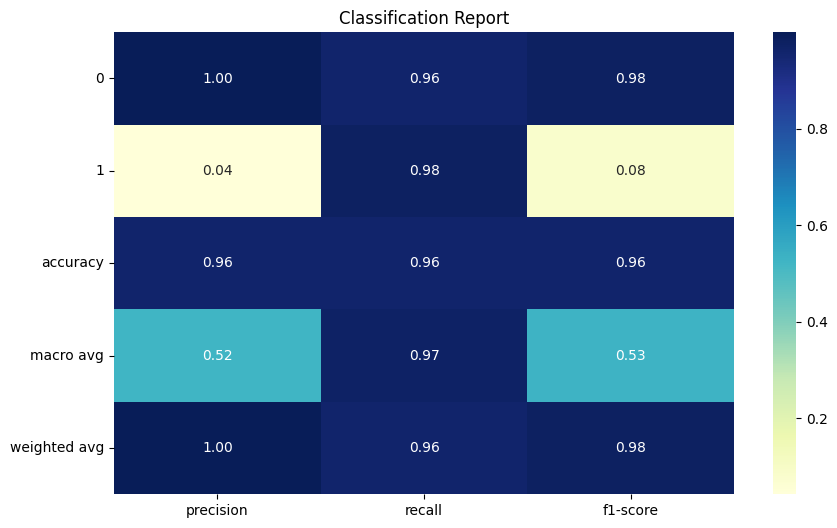

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")


plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


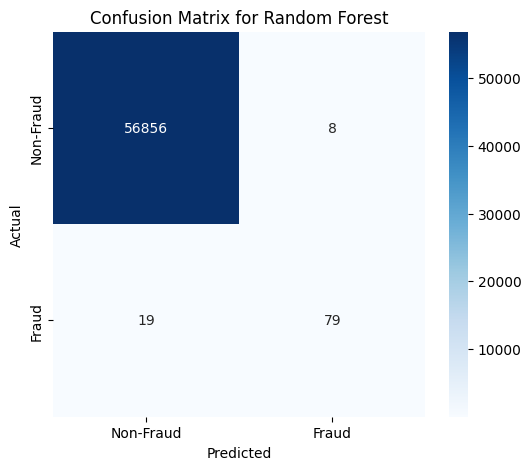

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


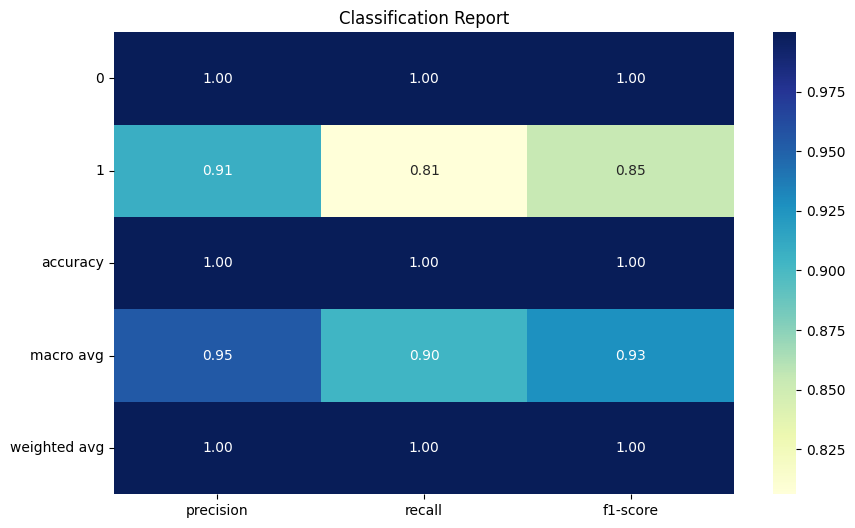

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(


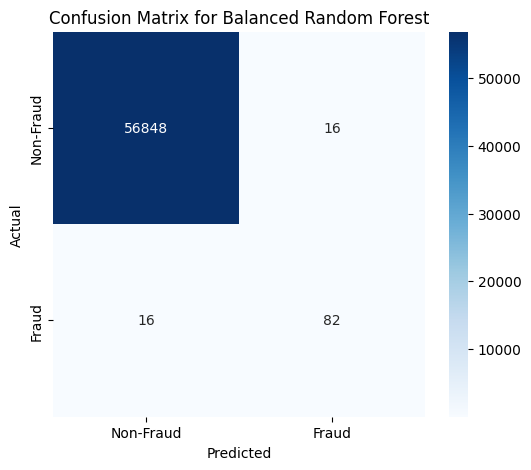

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf = BalancedRandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Balanced Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


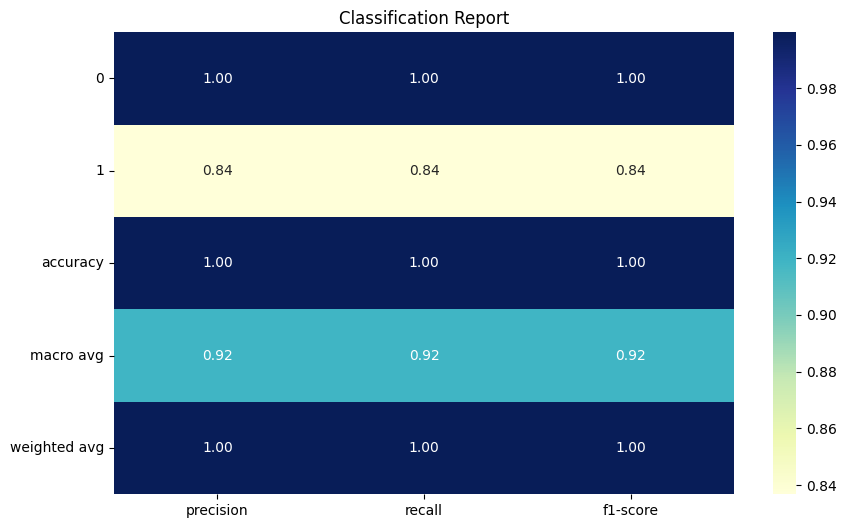

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")


plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1/20 ratio
ros = RandomOverSampler(sampling_strategy=1/20, random_state=42)

X_resampled, y_resampled = ros.fit_resample(df, y)
print("After oversampling:", Counter(y_resampled))

After oversampling: Counter({0: 284315, 1: 14215})


Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2986/2986 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9907 - loss: 0.0478 - val_accuracy: 0.9947 - val_loss: 0.0161
Epoch 2/6
2986/2986 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9975 - val_loss: 0.0082
Epoch 3/6
2986/2986 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9966 - val_loss: 0.0084
Epoch 4/6
2986/2986 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9987 - val_loss: 0.0038
Epoch 5/6
2986/2986 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9985 - val_loss: 0.0045
Epoch 6/6
2986/2986 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9990 - val_loss: 0.0034
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0347
Accuracy: 0.9872
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


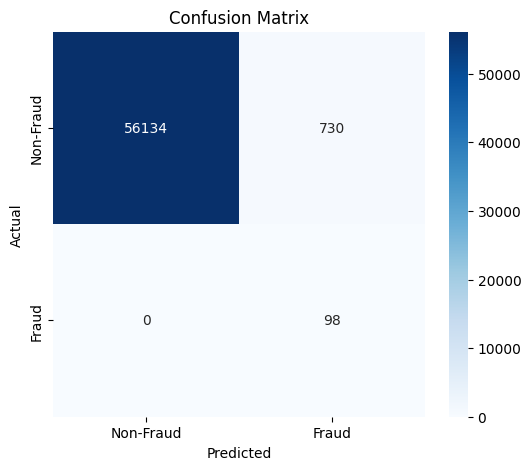

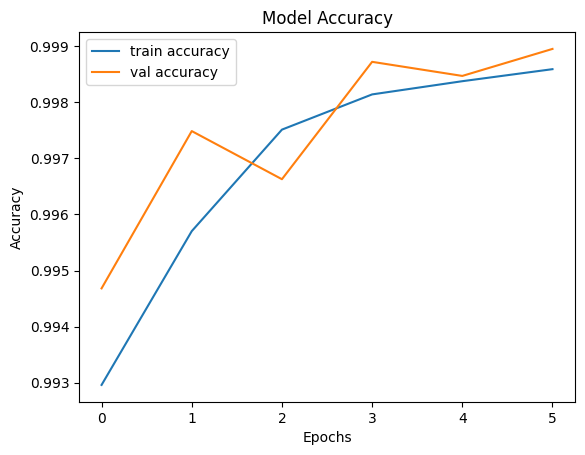

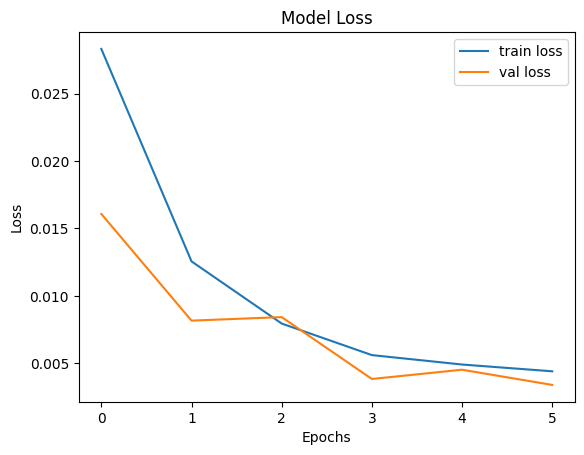

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      1.00      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.99      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


print(classification_report(y_test, y_pred))


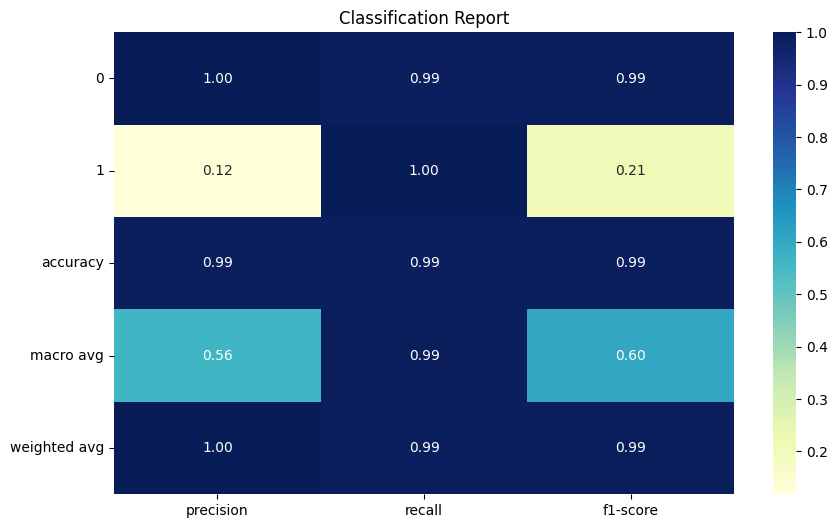

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


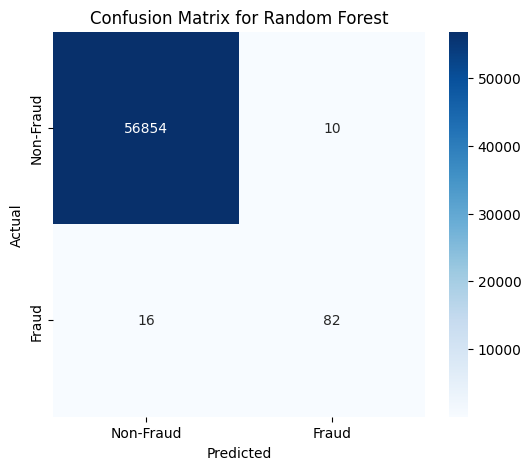

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
X_train, _, y_train, _ = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


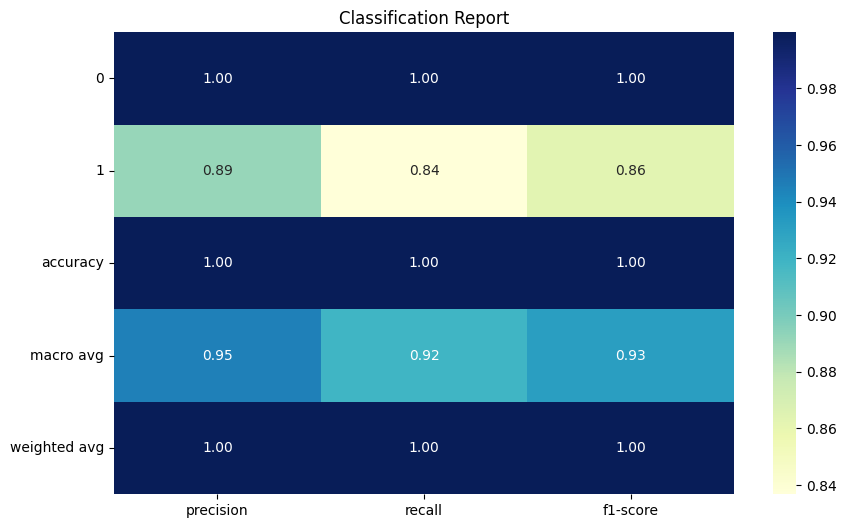

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(


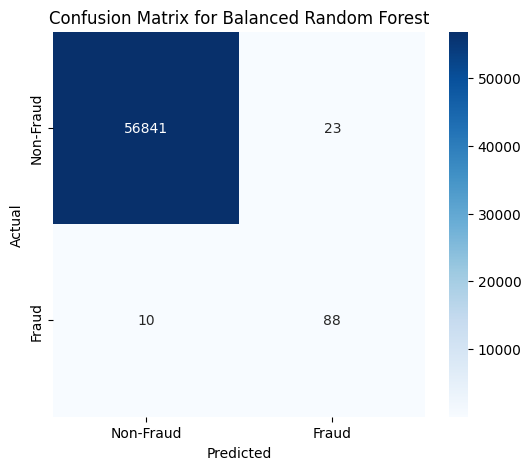

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf = BalancedRandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Balanced Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


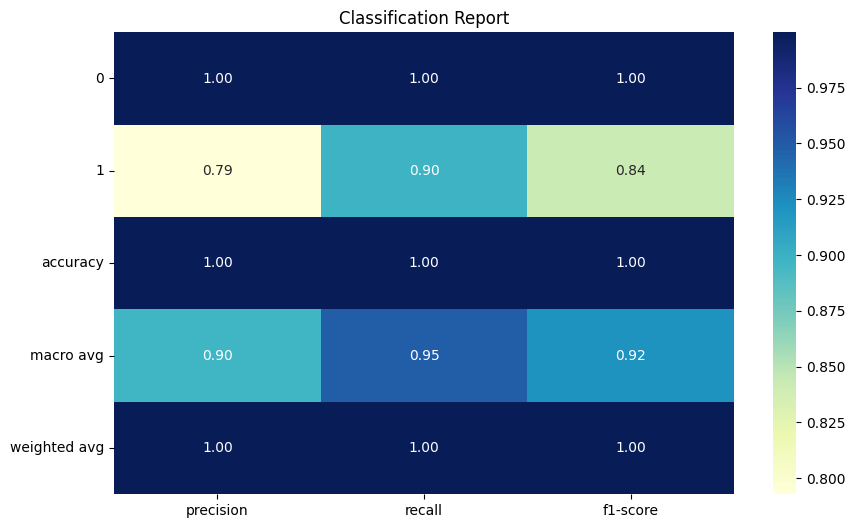

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report = df_report.drop(columns="support")

plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.show()
